# Abdelrahman Ayman Samy Mohamed, 222100930
# Yassmin Mohamed Mahmoud Metwally, 222101910
# Shahd Mamdouh Ali Hassan, 222102250
# Seif Amr Abdelhafez abdo , 222102312

# 1.1- Loading ratings matrix

In [6]:
import pandas as pd

# Load the subset interactions file (userId, movieId, rating)
df = pd.read_csv("../data/ratings_subset.csv")

# Build the ratings matrix R (users x items), missing ratings become NaN
R = df.pivot_table(
    index="userId",
    columns="movieId",
    values="rating",
    aggfunc="mean"
)

print("R shape (users x items):", R.shape)
print("Missing values:", R.isna().sum().sum())
R.head()


R shape (users x items): (11000, 600)
Missing values: 3477919


movieId,1,2,6,10,11,16,17,19,21,25,...,48774,48780,49272,51662,54286,55820,56367,58559,59315,60069
userId,,,,,,,,,,,,,,,,,,,,,
11,4.5,NaN,NaN,2.5,NaN,NaN,NaN,3.5,NaN,NaN,...,4.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,5.0,5.0
24,4.0,NaN,4.0,3.0,NaN,5.0,NaN,NaN,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,4.0,3.0,3.0,4.0,5.0,2.0,2.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,5.0,NaN,4.5,NaN,4.5,4.0,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,4.0,3.5,NaN,4.0,4.0,NaN,NaN,2.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tu = pd.read_csv("../results/tables/Target_Users_U1_U2_U3.csv")
ti = pd.read_csv("../results/tables/Target_Items_I1_I2.csv")

R_probe = df[df["userId"].isin(tu["userId"]) & df["movieId"].isin(ti["movieId"])].pivot(
    index="userId", columns="movieId", values="rating"
)

print(R_probe)


movieId  1562  2701
userId             
8405      1.5   1.5
88604     2.0   2.0
118205    3.0   2.0


# 1.2- Calculating the average rating for each item

In [8]:
item_means = R.mean(axis=0).round(2)

print("Number of items:", item_means.shape[0])
print(item_means.head(10))
item_means.to_csv("../results/tables/item_average_ratings.csv", header=["avg_rating"])


Number of items: 600
movieId
1     3.85
2     2.96
6     3.80
10    3.30
11    3.46
16    3.79
17    3.78
19    2.47
21    3.48
25    3.64
dtype: float64


# 1.3- Applying mean-filling

In [9]:
R_filled = R.fillna(item_means)

print("Missing values after mean-fill:", R_filled.isna().sum().sum())
R_filled.head()

Missing values after mean-fill: 0


movieId,1,2,6,10,11,16,17,19,21,25,...,48774,48780,49272,51662,54286,55820,56367,58559,59315,60069
userId,,,,,,,,,,,,,,,,,,,,,
11,4.5,2.96,3.8,2.5,3.46,3.79,3.78,3.50,3.48,3.64,...,4.00,3.93,3.78,5.00,3.82,3.98,3.81,5.00,5.00,5.00
24,4.0,2.96,4.0,3.0,3.46,5.00,3.78,2.47,3.00,5.00,...,3.83,3.93,3.78,3.55,3.82,3.98,3.81,4.14,3.81,4.01
54,4.0,3.00,3.0,4.0,5.00,2.00,2.00,2.47,2.00,2.00,...,3.83,3.93,3.78,3.55,3.82,3.98,3.81,4.14,3.81,4.01
58,5.0,2.96,4.5,3.3,4.50,4.00,3.78,2.47,5.00,3.64,...,3.83,3.93,3.78,3.55,3.82,3.98,3.81,4.14,3.81,4.01
91,4.0,3.50,3.8,4.0,4.00,3.79,3.78,2.00,4.00,3.64,...,3.83,3.93,3.78,3.55,3.82,3.98,3.81,4.14,3.81,4.01


In [10]:
R_filled.to_csv("../results/tables/R_mean_filled.csv")

# 1.4- Verifying matrix completeness (no missing values).

In [11]:
missing = R_filled.isna().sum().sum()
print("Missing values:", missing)

assert missing == 0, "R_filled still contains missing values!"

Missing values: 0


# 2.1- Computing the full SVD

In [12]:
import numpy as np

# Convert to numpy array
A = R_filled.to_numpy(dtype=np.float64)

# Full SVD (economy SVD)
U, s, VT = np.linalg.svd(A, full_matrices=False)

# Build Σ as a diagonal matrix
Sigma = np.diag(s)

print("A shape:", A.shape)
print("U shape:", U.shape)
print("Sigma shape:", Sigma.shape)
print("VT shape:", VT.shape)
print("Top 10 singular values:", s[:10])

A shape: (11000, 600)
U shape: (11000, 600)
Sigma shape: (600, 600)
VT shape: (600, 600)
Top 10 singular values: [9102.79339562  321.3422531   220.12107575  204.07624874  186.15421397
  176.10382995  166.14111157  152.18800806  148.35680221  136.77792645]


# 2.2- Calculating and saving

In [13]:
# Singular values (σ_i)
np.save("../results/tables/singular_values.npy", s)

# V matrix (right singular vectors)
V = VT.T
np.save("../results/tables/V.npy", V)
# Eigenpairs of A^T A
eigenvalues = s**2
np.save("../results/tables/eigenvalues_AtA.npy", eigenvalues)
np.save("../results/tables/eigenvectors_AtA.npy", V)

# 2.3- Verify orthogonality

In [14]:
import os

os.makedirs("../results/tables", exist_ok=True)

m, r = U.shape
r2, n = VT.shape
assert r == r2

I_r = np.eye(r)

UtU = U.T @ U
VtV = VT @ VT.T   

dev_U = UtU - I_r
dev_V = VtV - I_r

print("||U^T U - I||_F =", np.linalg.norm(dev_U, ord="fro"))
print("||V^T V - I||_F =", np.linalg.norm(dev_V, ord="fro"))
print("max|U^T U - I| =", np.max(np.abs(dev_U)))
print("max|V^T V - I| =", np.max(np.abs(dev_V)))


||U^T U - I||_F = 7.384884777968385e-14
||V^T V - I||_F = 7.234812197956035e-14
max|U^T U - I| = 3.3306690738754696e-15
max|V^T V - I| = 3.552713678800501e-15


In [15]:
# Save deviation matrices
np.save("../results/tables/UtU.npy", UtU)
np.save("../results/tables/VtV.npy", VtV)
np.save("../results/tables/dev_UtU.npy", dev_U)
np.save("../results/tables/dev_VtV.npy", dev_V)

# 2.4- Singular values plot

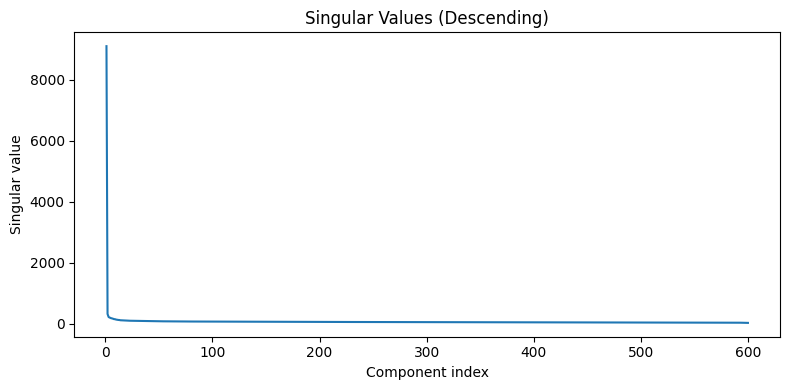

In [16]:
import matplotlib.pyplot as plt

os.makedirs("../results/plots", exist_ok=True)

idx = np.arange(1, len(s) + 1)

plt.figure(figsize=(8, 4))
plt.plot(idx, s, linewidth=1.5)
plt.title("Singular Values (Descending)")
plt.xlabel("Component index")
plt.ylabel("Singular value")
plt.tight_layout()
plt.savefig("../results/plots/singular_values.png", dpi=200)
plt.show()

# 2.4 cont- Scree plot 

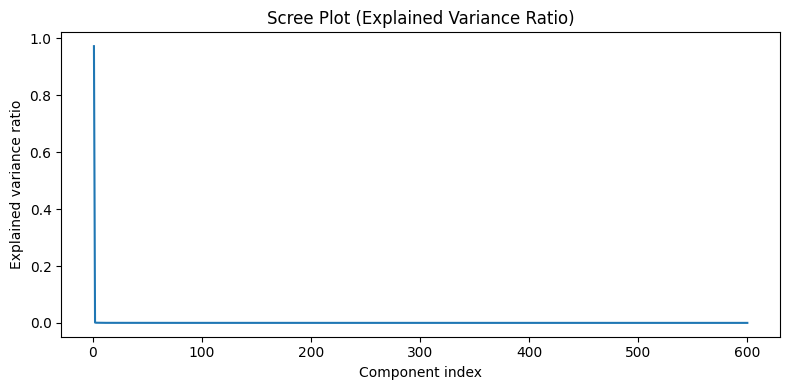

In [17]:
idx = np.arange(1, len(s) + 1)
explained_ratio = (s**2) / (s**2).sum()

plt.figure(figsize=(8, 4))
plt.plot(idx, explained_ratio, linewidth=1.5)
plt.title("Scree Plot (Explained Variance Ratio)")
plt.xlabel("Component index")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.savefig("../results/plots/scree_plot_explained_variance_ratio.png", dpi=200)
plt.show()

# 3.1- Implementing truncated SVD for different values of k (latent factors)

In [18]:
V = VT.T
k_values = [5, 20, 50, 100]

for k in k_values:
    Uk = U[:, :k]
    Sigmak = np.diag(s[:k])
    Vk = V[:, :k]

    print("\n" + "="*60)
    print(f"k = {k}")
    print("Uk shape:", Uk.shape, "| preview:\n", np.round(Uk[:5, :min(5, k)], 4))
    print("Sigmak shape:", Sigmak.shape, "| preview:\n", np.round(Sigmak[:min(5, k), :min(5, k)], 4))
    print("Vk shape:", Vk.shape, "| preview:\n", np.round(Vk[:5, :min(5, k)], 4))

    np.save(f"../results/tables/Uk_k{k}.npy", Uk)
    np.save(f"../results/tables/Sigmak_k{k}.npy", Sigmak)
    np.save(f"../results/tables/Vk_k{k}.npy", Vk)


k = 5
Uk shape: (11000, 5) | preview:
 [[-0.0102  0.0193 -0.0067 -0.0014  0.0104]
 [-0.0097  0.0083 -0.006  -0.0179  0.0079]
 [-0.0099  0.0136  0.0064 -0.0175 -0.0088]
 [-0.0105 -0.0032  0.005  -0.005   0.0064]
 [-0.0093  0.003   0.006   0.0024  0.0049]]
Sigmak shape: (5, 5) | preview:
 [[9102.7934    0.        0.        0.        0.    ]
 [   0.      321.3423    0.        0.        0.    ]
 [   0.        0.      220.1211    0.        0.    ]
 [   0.        0.        0.      204.0762    0.    ]
 [   0.        0.        0.        0.      186.1542]]
Vk shape: (600, 5) | preview:
 [[-0.0445  0.0313  0.1346 -0.0532  0.0582]
 [-0.0342  0.0682  0.0078  0.0155 -0.0237]
 [-0.0438 -0.0198 -0.03   -0.0132  0.0184]
 [-0.0382  0.0535 -0.0199 -0.0252 -0.009 ]
 [-0.0399  0.0182  0.0359  0.0432 -0.0294]]

k = 20
Uk shape: (11000, 20) | preview:
 [[-0.0102  0.0193 -0.0067 -0.0014  0.0104]
 [-0.0097  0.0083 -0.006  -0.0179  0.0079]
 [-0.0099  0.0136  0.0064 -0.0175 -0.0088]
 [-0.0105 -0.0032  0.005  -

# 3.2-

In [19]:
A = R_filled.to_numpy(dtype=np.float64)
for k in k_values:
    Uk = U[:, :k]
    Sigmak = np.diag(s[:k])
    Vk = V[:, :k]

    R_hat_k = Uk @ Sigmak @ Vk.T

    print("\n" + "="*60)
    print(f"k = {k}")
    print("R_hat_k shape:", R_hat_k.shape)
    print("R_hat_k preview (top-left 5x5):\n", np.round(R_hat_k[:5, :5], 4))

    np.save(f"../results/tables/Uk_k{k}.npy", Uk)
    np.save(f"../results/tables/Sigmak_k{k}.npy", Sigmak)
    np.save(f"../results/tables/Vk_k{k}.npy", Vk)
    np.save(f"../results/tables/Rhat_k{k}.npy", R_hat_k)


k = 5
R_hat_k shape: (11000, 600)
R_hat_k preview (top-left 5x5):
 [[4.2636 3.5442 4.0345 3.8996 3.7031]
 [4.1086 3.0942 3.9215 3.6085 3.3169]
 [4.4263 3.3716 3.828  3.7427 3.6159]
 [4.5083 3.1738 4.2241 3.5957 3.7689]
 [4.0119 2.9648 3.6676 3.2409 3.4465]]

k = 20
R_hat_k shape: (11000, 600)
R_hat_k preview (top-left 5x5):
 [[4.3519 4.1537 3.5496 3.2707 3.3087]
 [3.9897 2.8762 3.7806 3.4694 3.343 ]
 [4.4196 3.2476 3.6591 3.8299 3.7213]
 [4.274  3.0048 4.4412 3.5955 3.7498]
 [4.1287 3.1177 3.4507 3.2565 3.4117]]

k = 50
R_hat_k shape: (11000, 600)
R_hat_k preview (top-left 5x5):
 [[4.7578 4.1174 3.3499 3.0754 3.4117]
 [4.2185 2.7703 3.8588 3.4034 3.4166]
 [4.2932 3.1665 3.3806 3.6383 3.4992]
 [4.5968 2.7773 4.5057 3.4073 4.0037]
 [4.3012 3.3654 3.3453 3.4547 3.5364]]

k = 100
R_hat_k shape: (11000, 600)
R_hat_k preview (top-left 5x5):
 [[4.6083 4.2037 3.3464 3.0098 3.4749]
 [3.8828 3.0265 3.9559 3.3857 3.0809]
 [4.3173 2.8898 3.2973 4.0054 3.8051]
 [4.6257 2.8907 4.1833 3.2744 4.2041]

# 3.3- MAE

In [20]:
rows = []

for k in k_values:
    Uk = U[:, :k]
    Sigmak = np.diag(s[:k])
    Vk = V[:, :k]

    A_hat = Uk @ Sigmak @ Vk.T

    mae = np.mean(np.abs(A - A_hat))
    print(f"k={k} | MAE={mae:.6f}")

    rows.append({"k": k, "MAE": mae})

mae_df = pd.DataFrame(rows)
mae_df.to_csv("../results/tables/truncated_svd_mae.csv", index=False)

k=5 | MAE=0.362586
k=20 | MAE=0.347938
k=50 | MAE=0.329587
k=100 | MAE=0.305107


# 3.3 cont- RMSE


In [21]:
rows = []

for k in k_values:
    Uk = U[:, :k]
    Sigmak = np.diag(s[:k])
    Vk = V[:, :k]

    A_hat = Uk @ Sigmak @ Vk.T

    rmse = np.sqrt(np.mean((A - A_hat) ** 2))
    print(f"k={k} | RMSE={rmse:.6f}")

    rows.append({"k": k, "RMSE": rmse})

rmse_df = pd.DataFrame(rows)
rmse_df.to_csv("../results/tables/truncated_svd_rmse.csv", index=False)

k=5 | RMSE=0.561787
k=20 | RMSE=0.526717
k=50 | RMSE=0.491255
k=100 | RMSE=0.446557


# 3.4- error vs. k elbow curve for SVD

<function matplotlib.pyplot.show(close=None, block=None)>

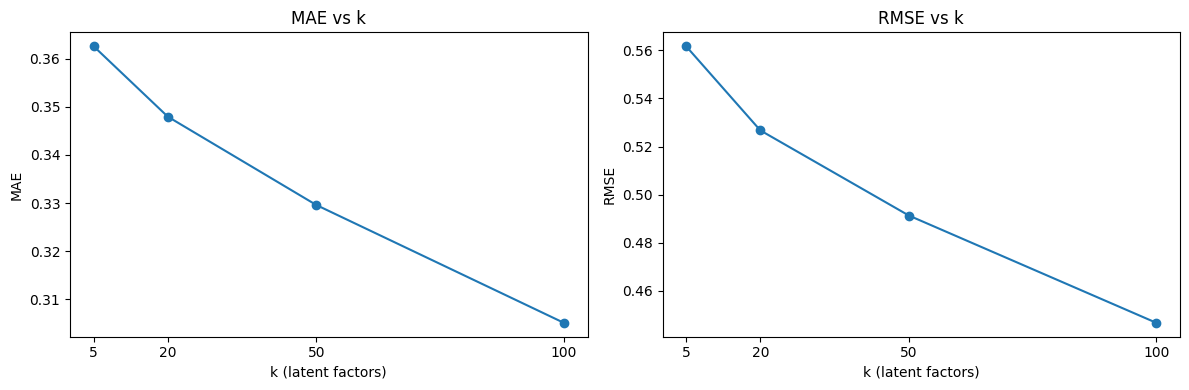

In [22]:
mae_df = pd.read_csv("../results/tables/truncated_svd_mae.csv")
rmse_df = pd.read_csv("../results/tables/truncated_svd_rmse.csv")

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

# Left: MAE vs k
axes[0].plot(mae_df["k"], mae_df["MAE"], marker="o", linewidth=1.5)
axes[0].set_title("MAE vs k")
axes[0].set_xlabel("k (latent factors)")
axes[0].set_ylabel("MAE")
axes[0].set_xticks(mae_df["k"])

# Right: RMSE vs k
axes[1].plot(rmse_df["k"], rmse_df["RMSE"], marker="o", linewidth=1.5)
axes[1].set_title("RMSE vs k")
axes[1].set_xlabel("k (latent factors)")
axes[1].set_ylabel("RMSE")
axes[1].set_xticks(rmse_df["k"])

plt.tight_layout()
plt.savefig("../results/plots/errors_mae_rmse.png", dpi=200)
plt.show

# 3.4 cont- percentage of variance retaine vs. K

<function matplotlib.pyplot.show(close=None, block=None)>

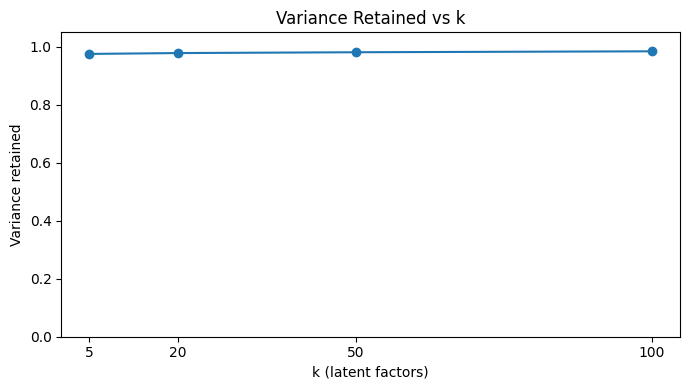

In [23]:
total_var = np.sum(s**2)
rows = []
for k in k_values:
    retained = np.sum(s[:k]**2) / total_var
    rows.append({"k": k, "variance_retained": retained})

var_df = pd.DataFrame(rows)
var_df.to_csv("../results/tables/variance_retained_vs_k.csv", index=False)

plt.figure(figsize=(7,4))
plt.plot(var_df["k"], var_df["variance_retained"], marker="o", linewidth=1.5)
plt.title("Variance Retained vs k")
plt.xlabel("k (latent factors)")
plt.ylabel("Variance retained")
plt.ylim(0, 1.05)
plt.xticks(var_df["k"])
plt.tight_layout()
plt.savefig("../results/plots/variance_retained_vs_k.png", dpi=200)
plt.show

# 3.4 cont- optimal K

In [24]:
optimal_k = 20
pd.DataFrame({"optimal_k": [optimal_k]}).to_csv(
    "../results/tables/optimal_k.csv", index=False
)

# 4.1

In [25]:
k_opt = int(pd.read_csv("../results/tables/optimal_k.csv")["optimal_k"].iloc[0])

Uk = U[:, :k_opt]
Sigmak = np.diag(s[:k_opt])
Vk = V[:, :k_opt]

print("k_opt =", k_opt)
print("Uk shape:", Uk.shape)
print("Sigmak shape:", Sigmak.shape)
print("Vk shape:", Vk.shape)

# Save factors for later tasks 
np.save("../results/tables/Uk_opt.npy", Uk)
np.save("../results/tables/Sigmak_opt.npy", Sigmak)
np.save("../results/tables/Vk_opt.npy", Vk)

k_opt = 20
Uk shape: (11000, 20)
Sigmak shape: (20, 20)
Vk shape: (600, 20)


# 4.2- Predict missing 

In [26]:

target_users = tu["userId"].astype("int64").tolist()
target_items = ti["movieId"].astype("int64").tolist()

# ---- Load k=20 factors from Task 4.1 ----
Uk = np.load("../results/tables/Uk_opt.npy")         # (11000, 20)
Sigmak = np.load("../results/tables/Sigmak_opt.npy")# (20, 20)
Vk = np.load("../results/tables/Vk_opt.npy")        # (600, 20)

user_index = sorted(df["userId"].unique())     # must match your pivot ordering
item_index = sorted(df["movieId"].unique())    # must match your pivot ordering

user_to_row = {u: i for i, u in enumerate(user_index)}
item_to_row = {m: j for j, m in enumerate(item_index)}  # row in Vk (since Vk is items x k)

# ---- Predict for each (user, item) ----
pred_rows = []
for u in target_users:
    for m in target_items:
        u_row = user_to_row[u]
        m_row = item_to_row[m]

        u_vec = Uk[u_row, :]      # (k,)
        v_vec = Vk[m_row, :]      # (k,)

        r_hat = float(u_vec @ Sigmak @ v_vec.T)
        pred_rows.append({"userId": u, "movieId": m, "pred_rating": r_hat})

pred_df = pd.DataFrame(pred_rows).round(2)
print(pred_df)

# Save for Task 4.3 (structured table)
pred_df.to_csv("../results/tables/predictions_U1U2U3_I1I2_k20.csv", index=False)

   userId  movieId  pred_rating
0    8405     1562         1.36
1    8405     2701         1.28
2  118205     1562         2.53
3  118205     2701         2.46
4   88604     1562         1.93
5   88604     2701         1.92


# 4.3- Structured table

In [27]:
pred_df = pd.read_csv("../results/tables/predictions_U1U2U3_I1I2_k20.csv")

# Structured table: rows=userId, cols=movieId, values=pred_rating
pred_table = pred_df.pivot(index="userId", columns="movieId", values="pred_rating")

print("Predicted ratings table (k=20):")
print(pred_table)

pred_table.to_csv("../results/tables/predicted_ratings_table_k20.csv", index=False)

Predicted ratings table (k=20):
movieId  1562  2701
userId             
8405     1.36  1.28
88604    1.93  1.92
118205   2.53  2.46


# 4.4- Ground truth

In [28]:
subset = pd.read_csv("../data/ratings_subset.csv")
gt_df = subset[subset["userId"].isin(target_users) & subset["movieId"].isin(target_items)][
    ["userId", "movieId", "rating"]
].copy()

gt_df.rename(columns={"rating": "true_rating"}, inplace=True)

print("Ground-truth rows:", len(gt_df))
print(gt_df)
gt_df.to_csv("../results/tables/ground_truth_U1U2U3_I1I2.csv", index=False)

Ground-truth rows: 6
         userId  movieId  true_rating
196786     8405     1562          1.5
196918     8405     2701          1.5
1998793   88604     1562          2.0
1998923   88604     2701          2.0
2668132  118205     1562          3.0
2668264  118205     2701          2.0


# 4.4- prediction accuracy (MAE, RMSE)

In [29]:
pred_df = pd.read_csv("../results/tables/predictions_U1U2U3_I1I2_k20.csv")
gt_df = pd.read_csv("../results/tables/ground_truth_U1U2U3_I1I2.csv")

# Join predictions with ground truth on (userId, movieId)
eval_df = gt_df.merge(pred_df, on=["userId", "movieId"], how="inner")

# If some pairs are missing in ground truth, this will be < 6
print("Evaluated pairs:", len(eval_df))
print(eval_df)

errors = eval_df["true_rating"] - eval_df["pred_rating"]
mae = np.mean(np.abs(errors))
rmse = np.sqrt(np.mean(errors**2))

print(f"MAE (k=20) on target pairs: {mae:.2f}")
print(f"RMSE (k=20) on target pairs: {rmse:.2f}")


Evaluated pairs: 6
   userId  movieId  true_rating  pred_rating
0    8405     1562          1.5         1.36
1    8405     2701          1.5         1.28
2   88604     1562          2.0         1.93
3   88604     2701          2.0         1.92
4  118205     1562          3.0         2.53
5  118205     2701          2.0         2.46
MAE (k=20) on target pairs: 0.24
RMSE (k=20) on target pairs: 0.29


In [30]:
mae = pd.read_csv("../results/tables/truncated_svd_mae.csv")   # columns: k, MAE
rmse = pd.read_csv("../results/tables/truncated_svd_rmse.csv") # columns: k, RMSE

svd_recon = mae.merge(rmse, on="k", how="inner").sort_values("k")
svd_recon.to_csv("../results/tables/svd_reconstruction_errors.csv", index=False)

print("Saved:", "../results/tables/svd_reconstruction_errors.csv")
print(svd_recon.head())


Saved: ../results/tables/svd_reconstruction_errors.csv
     k       MAE      RMSE
0    5  0.362586  0.561787
1   20  0.347938  0.526717
2   50  0.329587  0.491255
3  100  0.305107  0.446557


In [35]:
R_hat_k_df = pd.DataFrame(R_hat_k, index=R.index, columns=R.columns)

tu = pd.read_csv("../results/tables/Target_Users_U1_U2_U3.csv")
ti = pd.read_csv("../results/tables/Target_Items_I1_I2.csv")

target_users = tu["userId"].tolist()
target_items = ti["movieId"].tolist()

pairs = []
for u in target_users:
    for m in target_items:
        if (u in R.index) and (m in R.columns):
            true = R.loc[u, m]  # may be NaN
            pred = R_hat_k_df.loc[u, m]
            pairs.append({
                "userId": u,
                "movieId": m,
                "true_rating": None if pd.isna(true) else float(true),
                "pred_rating": float(pred)
            })

svd_pairs = pd.DataFrame(pairs)
svd_pairs.to_csv("../results/tables/eval_pairs_clean_k20.csv", index=False)

print("Saved ../results/tables/eval_pairs_clean_k20.csv")
print(svd_pairs.to_string(index=False))


Saved ../results/tables/eval_pairs_clean_k20.csv
  userId  movieId  true_rating  pred_rating
  8405.0   1562.0          1.5     1.276527
  8405.0   2701.0          1.5     1.120809
118205.0   1562.0          3.0     2.723000
118205.0   2701.0          2.0     2.440149
 88604.0   1562.0          2.0     1.901398
 88604.0   2701.0          2.0     1.925881


# 5.1(A) SVD vs PCA mean-filling

In [32]:
svd = pd.read_csv("../results/tables/svd_reconstruction_errors.csv")
svd["method"] = "SVD (truncated)"
svd = svd[["method","k","MAE","RMSE"]]

pca = pd.read_csv("../results/tables/pca_meanfill_reconstruction_errors.csv")
pca["method"] = "PCA mean-fill"
pca = pca[["method","k","MAE","RMSE"]]

compare_51 = (
    pd.concat([svd, pca], ignore_index=True)
      .sort_values(["k","method"])
)

# PRINT (this is the "5.1 print")
print(compare_51.to_string(index=False))

# SAVE for your report tables
compare_51.to_csv("../results/tables/compare_5_1_svd_vs_pca_meanfill.csv", index=False)


         method   k      MAE     RMSE
  PCA mean-fill   5 0.361484 0.560488
SVD (truncated)   5 0.362586 0.561787
  PCA mean-fill  20 0.347365 0.526328
SVD (truncated)  20 0.347938 0.526717
  PCA mean-fill  50 0.329336 0.491077
SVD (truncated)  50 0.329587 0.491255
  PCA mean-fill 100 0.304900 0.446429
SVD (truncated) 100 0.305107 0.446557


# 5.2- Compare prediction accuracy

In [ ]:
def metrics_from_pairs(path, method_name):
    df = pd.read_csv(path)

    df = df[pd.notna(df["true_rating"]) & pd.notna(df["pred_rating"])].copy()

    err = df["true_rating"].to_numpy() - df["pred_rating"].to_numpy()
    mae = float(np.mean(np.abs(err)))
    rmse = float(np.sqrt(np.mean(err**2)))

    return {
        "method": method_name,
        "pairs_evaluated": int(len(df)),
        "MAE": round(mae, 4),
        "RMSE": round(rmse, 4),
        "source_file": path
    }

rows = [
    metrics_from_pairs("../results/tables/eval_pairs_clean_k20.csv", "SVD (k=20)"),
    metrics_from_pairs("../results/tables/pca_meanfill_eval_pairs.csv", "PCA mean-fill (k=20)")
]

compare_52 = pd.DataFrame(rows).sort_values(["RMSE","MAE"])

print(compare_52.to_string(index=False))

compare_52.to_csv("../results/tables/compare_5_2_prediction_accuracy.csv", index=False)


              method  pairs_evaluated    MAE   RMSE                                   source_file
          SVD (k=20)                6 0.2488 0.2827    ../results/tables/eval_pairs_clean_k20.csv
PCA mean-fill (k=20)                6 0.2495 0.3010 ../results/tables/pca_meanfill_eval_pairs.csv


# 5.3- Compare computational efficiency

In [37]:
import time


A = R_filled.to_numpy(dtype=np.float64)
k = 20

t0 = time.perf_counter()
U, s, VT = np.linalg.svd(A, full_matrices=False)
t_decomp = time.perf_counter() - t0

Uk = U[:, :k]
sk = s[:k]
VTk = VT[:k, :]

# Memory for stored factors (MB)
mem_mb = (Uk.nbytes + sk.nbytes + VTk.nbytes) / (1024**2)

# Prediction timing: compute only 6 target predictions using R_hat_k
t1 = time.perf_counter()
R_hat_k = Uk @ np.diag(sk) @ VTk
t_pred = time.perf_counter() - t1

svd_perf = pd.DataFrame([{
    "method": "SVD (k=20)",
    "time_decomposition_sec": round(t_decomp, 4),
    "time_prediction_sec": round(t_pred, 4),
    "memory_factors_MB": round(mem_mb, 2)
}])

print(svd_perf.to_string(index=False))
svd_perf.to_csv("../results/tables/svd_runtime_memory.csv", index=False)


    method  time_decomposition_sec  time_prediction_sec  memory_factors_MB
SVD (k=20)                  1.4052               0.0376               1.77


In [38]:
svd = pd.read_csv("../results/tables/svd_runtime_memory.csv")
pca = pd.read_csv("../results/tables/pca_meanfill_runtime_memory.csv")

compare_53 = pd.concat([svd, pca], ignore_index=True)
print(compare_53.to_string(index=False))

compare_53.to_csv("../results/tables/compare_5_3_runtime_memory.csv", index=False)


              method  time_decomposition_sec  time_prediction_sec  memory_factors_MB
          SVD (k=20)                  1.4052               0.0376               1.77
PCA mean-fill (k=20)                  0.9870               0.0541               1.77


# 5.4- comparison tables

In [42]:
import pandas as pd

K = 20  # choose the k you want to report in the single table (usually 20)

# --- Load saved outputs from 5.1 / 5.2 / 5.3 ---
recon = pd.read_csv("../results/tables/compare_5_1_svd_vs_pca_meanfill.csv")
pred  = pd.read_csv("../results/tables/compare_5_2_prediction_accuracy.csv")
perf  = pd.read_csv("../results/tables/compare_5_3_runtime_memory.csv")

# --- 1) Reconstruction errors at k=K ---
recon_k = recon[recon["k"] == K].copy()
recon_k = recon_k.rename(columns={"MAE": "Recon_MAE", "RMSE": "Recon_RMSE"})
recon_k = recon_k[["method", "Recon_MAE", "Recon_RMSE"]]

# --- 2) Prediction errors (already at k=20 in your file) ---
pred2 = pred.copy()

# normalize column names (in case your file uses different casing)
rename_map = {}
if "MAE" in pred2.columns: rename_map["MAE"] = "Pred_MAE"
if "RMSE" in pred2.columns: rename_map["RMSE"] = "Pred_RMSE"
pred2 = pred2.rename(columns=rename_map)

keep_cols = ["method"] + [c for c in ["Pred_MAE", "Pred_RMSE", "pairs_evaluated"] if c in pred2.columns]
pred2 = pred2[keep_cols]

# --- 3) Runtime + memory ---
perf2 = perf.copy()
perf2 = perf2.rename(columns={
    "time_decomposition_sec": "Decomp_sec",
    "time_prediction_sec": "Predict_sec",
    "memory_factors_MB": "Memory_MB"
})
perf2 = perf2[["method", "Decomp_sec", "Predict_sec", "Memory_MB"]]

# --- Merge into one wide table ---
final = recon_k.merge(pred2, on="method", how="outer").merge(perf2, on="method", how="outer")

# Optional: order columns nicely
ordered_cols = ["method", "Recon_MAE", "Recon_RMSE", "Pred_MAE", "Pred_RMSE", "pairs_evaluated",
                "Decomp_sec", "Predict_sec", "Memory_MB"]
final = final[[c for c in ordered_cols if c in final.columns]]

print(final.to_string(index=False))
#final.to_csv("../results/tables/compare_5_4_final_wide_table.csv", index=False)


              method  Recon_MAE  Recon_RMSE  Pred_MAE  Pred_RMSE  pairs_evaluated  Decomp_sec  Predict_sec  Memory_MB
       PCA mean-fill   0.347365    0.526328       NaN        NaN              NaN         NaN          NaN        NaN
     SVD (truncated)   0.347938    0.526717       NaN        NaN              NaN         NaN          NaN        NaN
          SVD (k=20)        NaN         NaN    0.2488     0.2827              6.0      1.4052       0.0376       1.77
PCA mean-fill (k=20)        NaN         NaN    0.2495     0.3010              6.0      0.9870       0.0541       1.77


# 6.1- Analyze the top-3 latent factors

In [44]:
top3 = pd.DataFrame({
    "factor": [1, 2, 3],
    "singular_value": s[:3],
    "explained_energy_ratio": (s[:3]**2) / np.sum(s**2)
})

print(top3.to_string(index=False))
top3.to_csv("../results/tables/svd_top3_latent_factors.csv", index=False)


 factor  singular_value  explained_energy_ratio
      1     9102.793396                0.972867
      2      321.342253                0.001212
      3      220.121076                0.000569


# 6.2 (A)-Identifying items with highest absolute values in V 

In [46]:
V = VT.T  # shape: (num_items, num_factors)
V_df = pd.DataFrame(V, index=R.columns)  # index = movieId

TOP_N = 10
rows = []

for f in [0, 1, 2]:
    col = V_df.iloc[:, f]
    top = col.reindex(col.abs().sort_values(ascending=False).head(TOP_N).index)
    for movieId, v in top.items():
        rows.append({
            "factor": f + 1,
            "movieId": movieId,
            "V_value": float(v),
            "abs_V": float(abs(v)),
            "sign": "+" if v >= 0 else "-"
        })

top_items = pd.DataFrame(rows).sort_values(["factor", "abs_V"], ascending=[True, False])
print(top_items.to_string(index=False))
top_items.to_csv("../results/tables/svd_top_items_by_factor.csv", index=False)


 factor  movieId   V_value    abs_V sign
      1      858 -0.050657 0.050657    -
      1      318 -0.050465 0.050465    -
      1       50 -0.049428 0.049428    -
      1     1221 -0.049340 0.049340    -
      1     2019 -0.049193 0.049193    -
      1      296 -0.049070 0.049070    -
      1     1198 -0.048931 0.048931    -
      1      912 -0.048915 0.048915    -
      1      904 -0.048862 0.048862    -
      1      527 -0.048725 0.048725    -
      2      780  0.165074 0.165074    +
      2     1917  0.144355 0.144355    +
      2     2628  0.127309 0.127309    +
      2      736  0.111480 0.111480    +
      2     1101  0.103611 0.103611    +
      2     1721  0.099885 0.099885    +
      2     1206 -0.099120 0.099120    -
      2      377  0.098899 0.098899    +
      2      597  0.098343 0.098343    +
      2      586  0.096233 0.096233    +
      3       34  0.163649 0.163649    +
      3     1097  0.157233 0.157233    +
      3      595  0.147545 0.147545    +
      3      919

# 6.2 (B)-Identifying users with highest absolute values in U 

In [47]:
U_df = pd.DataFrame(U, index=R.index)  # index = userId

TOP_N = 10
rows = []

for f in [0, 1, 2]:
    col = U_df.iloc[:, f]
    top = col.reindex(col.abs().sort_values(ascending=False).head(TOP_N).index)
    for userId, u in top.items():
        rows.append({
            "factor": f + 1,
            "userId": userId,
            "U_value": float(u),
            "abs_U": float(abs(u)),
            "sign": "+" if u >= 0 else "-"
        })

top_users = pd.DataFrame(rows).sort_values(["factor", "abs_U"], ascending=[True, False])
print(top_users.to_string(index=False))
top_users.to_csv("../results/tables/svd_top_users_by_factor.csv", index=False)


 factor  userId   U_value    abs_U sign
      1  125794 -0.011678 0.011678    -
      1  133811 -0.011555 0.011555    -
      1    4594 -0.011532 0.011532    -
      1  106939 -0.011427 0.011427    -
      1  119661 -0.011225 0.011225    -
      1   86676 -0.011212 0.011212    -
      1   34651 -0.011195 0.011195    -
      1   54160 -0.011151 0.011151    -
      1    4696 -0.011146 0.011146    -
      1   82801 -0.011141 0.011141    -
      2   92616  0.050925 0.050925    +
      2    4191 -0.050109 0.050109    -
      2  100134 -0.048278 0.048278    -
      2   52116 -0.042727 0.042727    -
      2  122980  0.040633 0.040633    +
      2   42353 -0.039738 0.039738    -
      2   65295 -0.039680 0.039680    -
      2   84476 -0.038541 0.038541    -
      2  131961 -0.038086 0.038086    -
      2   73293 -0.037936 0.037936    -
      3   25192 -0.062200 0.062200    -
      3   40285 -0.051491 0.051491    -
      3   92616 -0.047176 0.047176    -
      3   20132  0.045823 0.045823    +


# 6.3(A)- Compute 2D coordinates (users + items)

In [51]:

user_xy = pd.DataFrame({
    "userId": R.index,
    "x": U[:, 0] * s[0],
    "y": U[:, 1] * s[1],
})

# 2D item coordinates (use V scaled by singular values)
V = VT.T
item_xy = pd.DataFrame({
    "movieId": R.columns,
    "x": V[:, 0] * s[0],
    "y": V[:, 1] * s[1],
})

user_xy.to_csv("../results/tables/svd_users_2d.csv", index=False)
item_xy.to_csv("../results/tables/svd_items_2d.csv", index=False)

print(user_xy.head().to_string(index=False))
print(item_xy.head().to_string(index=False))


 userId          x         y
     11 -92.977683  6.216909
     24 -88.083281  2.661971
     54 -89.933765  4.381877
     58 -95.872290 -1.043957
     91 -84.815813  0.966802
 movieId           x         y
       1 -405.371723 10.042349
       2 -311.510915 21.930037
       6 -398.835424 -6.360159
      10 -347.323090 17.187359
      11 -363.494451  5.840443


# 6.3(B)- scatter plot showing user-item relationships

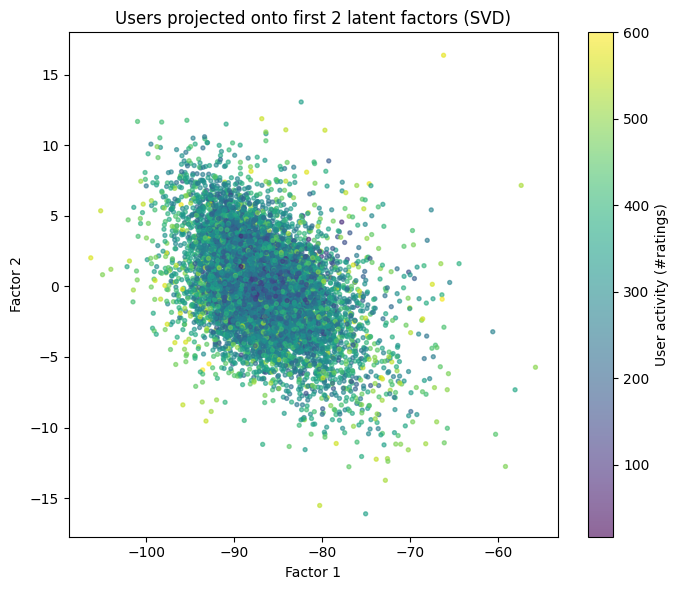

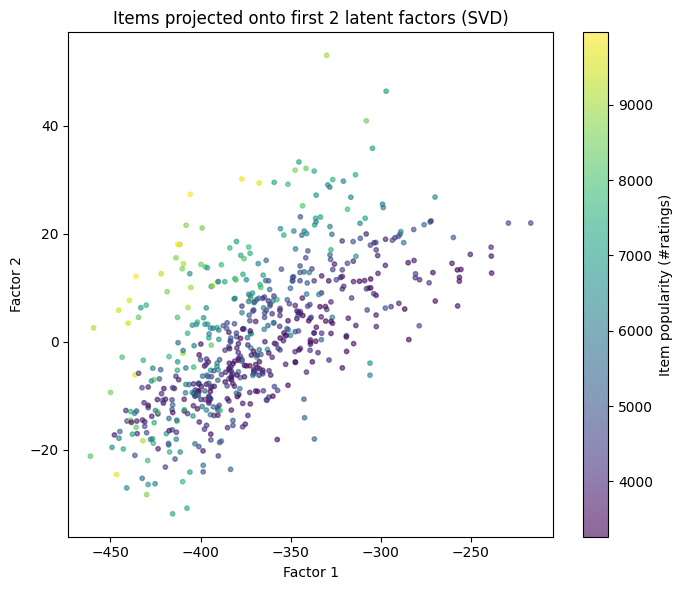

In [61]:
user_xy = pd.read_csv("../results/tables/svd_users_2d.csv")
item_xy = pd.read_csv("../results/tables/svd_items_2d.csv")

plt.figure(figsize=(7,6))
sc = plt.scatter(user_xy["x"], user_xy["y"], c=user_xy.get("activity"), s=8, alpha=0.6)
plt.colorbar(sc, label="User activity (#ratings)")
plt.title("Users projected onto first 2 latent factors (SVD)")
plt.xlabel("Factor 1"); plt.ylabel("Factor 2")
plt.tight_layout()
plt.savefig("../results/plots/svd_users_latent_space.png", dpi=200)
plt.show()

plt.figure(figsize=(7,6))
sc = plt.scatter(item_xy["x"], item_xy["y"], c=item_xy.get("popularity"), s=10, alpha=0.6)
plt.colorbar(sc, label="Item popularity (#ratings)")
plt.title("Items projected onto first 2 latent factors (SVD)")
plt.xlabel("Factor 1"); plt.ylabel("Factor 2")
plt.tight_layout()
plt.savefig("../results/plots/svd_items_latent_space.png", dpi=200)
plt.show()


# 6.3(C)- Color-code by user activity level or item popularity

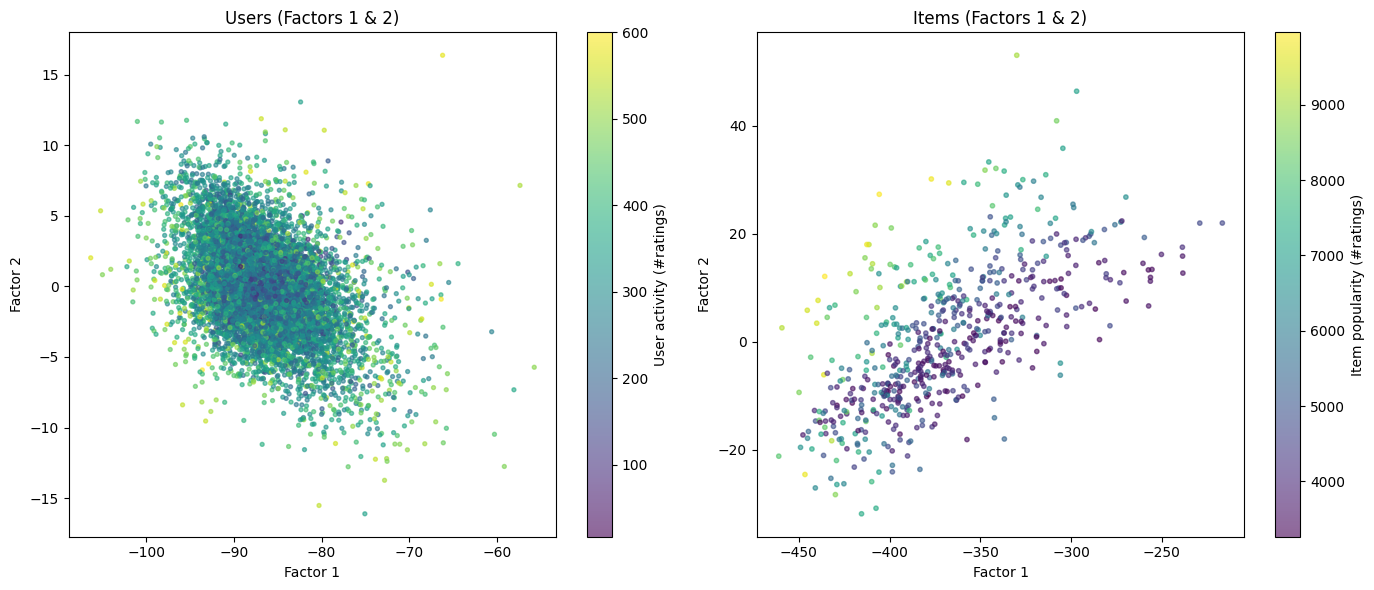

In [59]:
# ---- Color values ----
user_activity = R.notna().sum(axis=1).values      # (#users,)
item_popularity = R.notna().sum(axis=0).values    # (#items,)

# ---- 2D coordinates (scaled) ----
# Users: U * S
ux = U[:, 0] * s[0]
uy = U[:, 1] * s[1]

# Items: V * S  where V = VT.T
V = VT.T
ix = V[:, 0] * s[0]
iy = V[:, 1] * s[1]

# ---- Plot side-by-side ----
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Users subplot
sc1 = axes[0].scatter(ux, uy, c=user_activity, s=8, alpha=0.6)
axes[0].set_title("Users (Factors 1 & 2)")
axes[0].set_xlabel("Factor 1")
axes[0].set_ylabel("Factor 2")
cbar1 = fig.colorbar(sc1, ax=axes[0])
cbar1.set_label("User activity (#ratings)")

# Items subplot
sc2 = axes[1].scatter(ix, iy, c=item_popularity, s=10, alpha=0.6)
axes[1].set_title("Items (Factors 1 & 2)")
axes[1].set_xlabel("Factor 1")
axes[1].set_ylabel("Factor 2")
cbar2 = fig.colorbar(sc2, ax=axes[1])
cbar2.set_label("Item popularity (#ratings)")

fig.tight_layout()
fig.savefig("../results/plots/svd_latent_space_users_items.png", dpi=200, bbox_inches="tight")
plt.show()


# 7.1(A)- Vary missing ratings (10/30/50/70%)

In [69]:
rng = np.random.default_rng(42)
missing_pcts = [10, 30, 50, 70]

obs_pos = np.argwhere(R.notna().to_numpy())  # positions of observed ratings
n_obs = len(obs_pos)

def make_missing_version(R, missing_pct):
    n_hide = int((missing_pct/100) * n_obs)
    hide_idx = rng.choice(n_obs, size=n_hide, replace=False)
    hide_pos = obs_pos[hide_idx]

    R_miss = R.copy()
    hidden_truth = {}  # (userId, movieId) -> true rating
    for i, j in hide_pos:
        u = R.index[i]
        m = R.columns[j]
        hidden_truth[(u, m)] = float(R.iat[i, j])
        R_miss.iat[i, j] = np.nan
    return R_miss, hidden_truth, n_hide

# 7.1(B)- performing SVD for each percentage

In [68]:
def run_svd_reconstruct(R_miss, k=20):
    item_means = R_miss.mean(axis=0)
    R_filled = R_miss.fillna(item_means)

    A = R_filled.to_numpy(dtype=np.float64)
    U, s, VT = np.linalg.svd(A, full_matrices=False)

    Uk = U[:, :k]
    sk = s[:k]
    VTk = VT[:k, :]
    R_hat = Uk @ np.diag(sk) @ VTk

    return pd.DataFrame(R_hat, index=R_miss.index, columns=R_miss.columns)

# 7.1(C)- Measure reconstruction error

In [64]:
def recon_errors(R_hat, hidden_truth):
    y_true = np.array(list(hidden_truth.values()), dtype=float)
    y_pred = np.array([float(R_hat.loc[u, m]) for (u, m) in hidden_truth.keys()], dtype=float)

    mae = float(np.mean(np.abs(y_true - y_pred)))
    rmse = float(np.sqrt(np.mean((y_true - y_pred)**2)))
    return mae, rmse

# 7.1(D)Measure prediction accuracy

In [65]:
def prediction_errors_on_targets(R_hat):
    pairs = []
    for u in target_users:
        for m in target_items:
            if (u in R.index) and (m in R.columns):
                true = R.loc[u, m]  # original ground truth
                if pd.notna(true):
                    pred = float(R_hat.loc[u, m])
                    pairs.append((float(true), pred))

    if len(pairs) == 0:
        return np.nan, np.nan, 0

    t = np.array([a for a, b in pairs], dtype=float)
    p = np.array([b for a, b in pairs], dtype=float)
    mae = float(np.mean(np.abs(t - p)))
    rmse = float(np.sqrt(np.mean((t - p)**2)))
    return mae, rmse, len(pairs)

In [70]:
rows = []
for pct in [10, 30, 50, 70]:
    R_miss, hidden_truth, n_hide = make_missing_version(R, pct)
    R_hat = run_svd_reconstruct(R_miss, k=k)

    r_mae, r_rmse = recon_errors(R_hat, hidden_truth)
    p_mae, p_rmse, n_pairs = prediction_errors_on_targets(R_hat)

    rows.append({
        "missing_pct": pct,
        "k": k,
        "hidden_ratings": n_hide,
        "recon_MAE": round(r_mae, 4),
        "recon_RMSE": round(r_rmse, 4),
        "target_pairs_used": int(n_pairs),
        "pred_MAE": round(p_mae, 4) if pd.notna(p_mae) else None,
        "pred_RMSE": round(p_rmse, 4) if pd.notna(p_rmse) else None,
    })

results = pd.DataFrame(rows).sort_values("missing_pct")
print(results.to_string(index=False))
results.to_csv("../results/tables/task7_1_svd_missingness_results.csv", index=False)


 missing_pct  k  hidden_ratings  recon_MAE  recon_RMSE  target_pairs_used  pred_MAE  pred_RMSE
          10 20          312208     0.5864      0.7692                  6    0.2203     0.2917
          30 20          936624     0.6069      0.7915                  6    0.2313     0.3097
          50 20         1561040     0.6327      0.8211                  6    0.2560     0.3210
          70 20         2185456     0.6621      0.8549                  6    0.3581     0.4591


# 7.1(E)- error vs missingness percentage Plot 

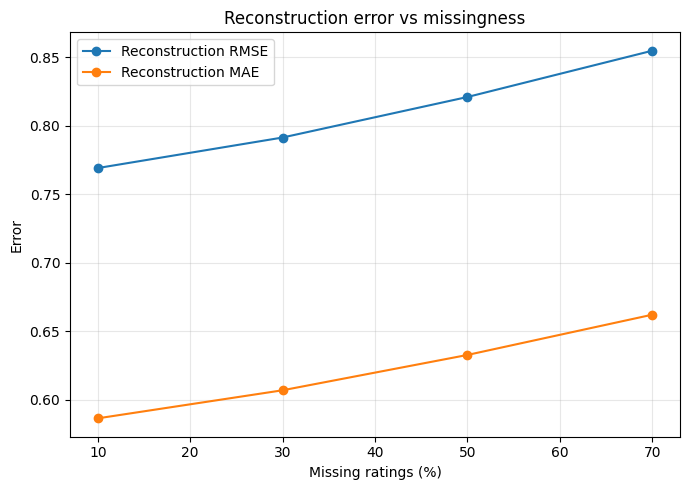

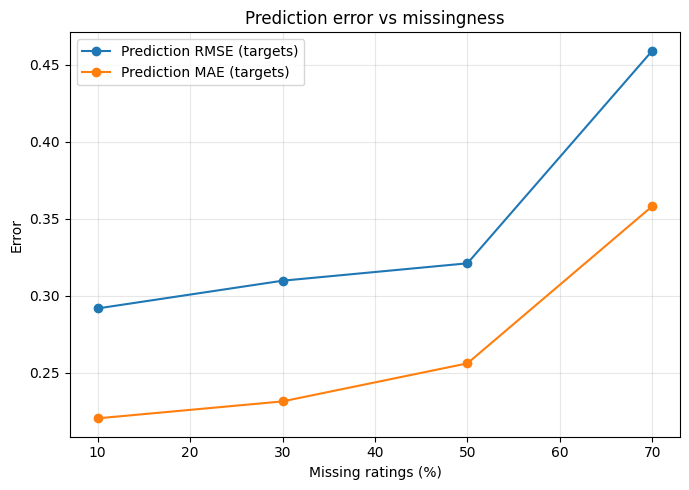

In [71]:
plt.figure(figsize=(7,5))
plt.plot(results["missing_pct"], results["recon_RMSE"], marker="o", label="Reconstruction RMSE")
plt.plot(results["missing_pct"], results["recon_MAE"], marker="o", label="Reconstruction MAE")
plt.xlabel("Missing ratings (%)")
plt.ylabel("Error")
plt.title("Reconstruction error vs missingness")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("../results/plots/task7_1_reconstruction_error_vs_missingness.png", dpi=200)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(results["missing_pct"], results["pred_RMSE"], marker="o", label="Prediction RMSE (targets)")
plt.plot(results["missing_pct"], results["pred_MAE"], marker="o", label="Prediction MAE (targets)")
plt.xlabel("Missing ratings (%)")
plt.ylabel("Error")
plt.title("Prediction error vs missingness")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("../results/plots/task7_1_prediction_error_vs_missingness.png", dpi=200)
plt.show()

# 7.2(A)- Item mean filling

In [72]:
def fill_item_mean(R_miss):
    item_means = R_miss.mean(axis=0)
    return R_miss.fillna(item_means)

def svd_reconstruct_from_filled(R_filled, k=20):
    A = R_filled.to_numpy(dtype=np.float64)
    U, s, VT = np.linalg.svd(A, full_matrices=False)
    R_hat = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    return pd.DataFrame(R_hat, index=R_filled.index, columns=R_filled.columns)

print("Item-mean fill")
R_item = fill_item_mean(R)
print("Missing after item-mean fill:", int(R_item.isna().sum().sum()))

Rhat_item = svd_reconstruct_from_filled(R_item, k=k)
print("Rhat_item preview:\n", Rhat_item.iloc[:3, :3].round(3).to_string())

# Save target predictions for comparison
pairs_item = []
for u in target_users:
    for m in target_items:
        if (u in R.index) and (m in R.columns):
            true = R.loc[u, m]
            if pd.notna(true):
                pairs_item.append({
                    "method": "SVD+ItemMean",
                    "k": k,
                    "userId": u,
                    "movieId": m,
                    "true_rating": float(true),
                    "pred_rating": float(Rhat_item.loc[u, m])
                })

pairs_item = pd.DataFrame(pairs_item)
print(pairs_item.to_string(index=False))
pairs_item.to_csv("../results/tables/task7_2_pairs_item_mean.csv", index=False)

Item-mean fill
Missing after item-mean fill: 0
Rhat_item preview:
 movieId      1      2      6
userId                      
11       4.352  4.153  3.547
24       3.989  2.876  3.779
54       4.419  3.248  3.657
      method  k   userId  movieId  true_rating  pred_rating
SVD+ItemMean 20   8405.0   1562.0          1.5     1.360119
SVD+ItemMean 20   8405.0   2701.0          1.5     1.272058
SVD+ItemMean 20 118205.0   1562.0          3.0     2.527237
SVD+ItemMean 20 118205.0   2701.0          2.0     2.457160
SVD+ItemMean 20  88604.0   1562.0          2.0     1.929760
SVD+ItemMean 20  88604.0   2701.0          2.0     1.919660


# 7.2- User mean filling

In [73]:
def fill_user_mean(R_miss):
    user_means = R_miss.mean(axis=1)
    return R_miss.T.fillna(user_means).T

print("User-mean fill")
R_user = fill_user_mean(R)
print("Missing after user-mean fill:", int(R_user.isna().sum().sum()))

Rhat_user = svd_reconstruct_from_filled(R_user, k=k)
print("Rhat_user preview:\n", Rhat_user.iloc[:3, :3].round(3).to_string())

pairs_user = []
for u in target_users:
    for m in target_items:
        if (u in R.index) and (m in R.columns):
            true = R.loc[u, m]
            if pd.notna(true):
                pairs_user.append({
                    "method": "SVD+UserMean",
                    "k": k,
                    "userId": u,
                    "movieId": m,
                    "true_rating": float(true),
                    "pred_rating": float(Rhat_user.loc[u, m])
                })

pairs_user = pd.DataFrame(pairs_user)
print(pairs_user.to_string(index=False))
pairs_user.to_csv("../results/tables/task7_2_pairs_user_mean.csv", index=False)

User-mean fill
Missing after user-mean fill: 0
Rhat_user preview:
 movieId      1      2      6
userId                      
11       4.749  4.483  4.065
24       3.748  3.439  3.707
54       4.510  3.431  3.724
      method  k   userId  movieId  true_rating  pred_rating
SVD+UserMean 20   8405.0   1562.0          1.5     0.846803
SVD+UserMean 20   8405.0   2701.0          1.5     0.796318
SVD+UserMean 20 118205.0   1562.0          3.0     2.428369
SVD+UserMean 20 118205.0   2701.0          2.0     2.089780
SVD+UserMean 20  88604.0   1562.0          2.0     1.612613
SVD+UserMean 20  88604.0   2701.0          2.0     1.607909


# 7.2(B)- Compare resulting predictions

In [74]:
a = pd.read_csv("../results/tables/task7_2_pairs_item_mean.csv")
b = pd.read_csv("../results/tables/task7_2_pairs_user_mean.csv")

cmp = a.merge(
    b[["userId","movieId","pred_rating"]],
    on=["userId","movieId"],
    suffixes=("_itemMean", "_userMean")
)

cmp["abs_diff_pred"] = (cmp["pred_rating_itemMean"] - cmp["pred_rating_userMean"]).abs()

# errors vs truth for each strategy
cmp["err_item"] = cmp["true_rating"] - cmp["pred_rating_itemMean"]
cmp["err_user"] = cmp["true_rating"] - cmp["pred_rating_userMean"]

mae_item = float(np.mean(np.abs(cmp["err_item"])))
rmse_item = float(np.sqrt(np.mean(cmp["err_item"]**2)))

mae_user = float(np.mean(np.abs(cmp["err_user"])))
rmse_user = float(np.sqrt(np.mean(cmp["err_user"]**2)))

print("Comparison (predictions)")
print(cmp[["userId","movieId","true_rating","pred_rating_itemMean","pred_rating_userMean","abs_diff_pred"]].to_string(index=False))

summary = pd.DataFrame([
    {"strategy": "Item mean", "MAE": round(mae_item,4), "RMSE": round(rmse_item,4)},
    {"strategy": "User mean", "MAE": round(mae_user,4), "RMSE": round(rmse_user,4)},
])

print("Summary (errors)")
print(summary.to_string(index=False))

cmp.to_csv("../results/tables/task7_2_prediction_comparison.csv", index=False)
summary.to_csv("../results/tables/task7_2_summary_errors.csv", index=False)

Comparison (predictions)
  userId  movieId  true_rating  pred_rating_itemMean  pred_rating_userMean  abs_diff_pred
  8405.0   1562.0          1.5              1.360119              0.846803       0.513316
  8405.0   2701.0          1.5              1.272058              0.796318       0.475739
118205.0   1562.0          3.0              2.527237              2.428369       0.098868
118205.0   2701.0          2.0              2.457160              2.089780       0.367380
 88604.0   1562.0          2.0              1.929760              1.612613       0.317148
 88604.0   2701.0          2.0              1.919660              1.607909       0.311750
Summary (errors)
 strategy    MAE   RMSE
Item mean 0.2414 0.2931
User mean 0.4663 0.5100


# 8.1(A)- Randomly select 50 users with > 20 ratings

In [90]:
rng = np.random.default_rng(42)

N_USERS = 50
MIN_RATINGS = 20

user_counts = R.notna().sum(axis=1)  # ratings per user
eligible_users = user_counts[user_counts > MIN_RATINGS].index.to_numpy()

selected_users = rng.choice(eligible_users, size=N_USERS, replace=False)

print("Eligible users (>20 ratings):", len(eligible_users))
print("Selected users count:", len(selected_users))
print("Selected users (first 10):", selected_users[:10].tolist())
pd.DataFrame({"userId": selected_users}).to_csv("../results/tables/task8_1_selected_users_summary.csv", index=False)


Eligible users (>20 ratings): 10999
Selected users count: 50
Selected users (first 10): [55765, 71330, 62710, 11706, 108123, 134220, 89138, 97410, 37962, 62095]


# 8.1(B)- Hiding 80% of their ratings to create cold-start scenario

In [77]:
HIDE_FRAC = 0.80

R_cold = R.copy()
hidden_rows = []

for u in selected_users:
    rated_items = R.columns[R.loc[u].notna()].to_numpy()
    n_hide = int(np.floor(HIDE_FRAC * len(rated_items)))
    hide_items = rng.choice(rated_items, size=n_hide, replace=False)

    for m in hide_items:
        hidden_rows.append({"userId": u, "movieId": m, "true_rating": float(R.loc[u, m])})
        R_cold.loc[u, m] = np.nan

print("Total hidden ratings:", len(hidden_rows))

# Quick check (before/after for first 10 users)
before = R.notna().sum(axis=1).loc[selected_users[:10]]
after  = R_cold.notna().sum(axis=1).loc[selected_users[:10]]
check = pd.DataFrame({"userId": selected_users[:10], "before": before.values, "after": after.values})
print(check.to_string(index=False))

# Save ground-truth of hidden ratings (for later evaluation)
pd.DataFrame(hidden_rows).to_csv("../results/tables/task8_1_hidden_ratings_ground_truth.csv", index=False)

Total hidden ratings: 12324
 userId  before  after
  55765     530    106
  71330     205     41
  62710     218     44
  11706     397     80
 108123     308     62
 134220     273     55
  89138     311     63
  97410     326     66
  37962     272     55
  62095     258     52


# 8.2(A)- Estimating user latent factors using limited ratings

In [78]:
# 1) Mean-fill the cold-start matrix so SVD can run
item_means = R_cold.mean(axis=0)
R_cold_filled = R_cold.fillna(item_means)

# 2) SVD on filled matrix
A = R_cold_filled.to_numpy(dtype=np.float64)
U, s, VT = np.linalg.svd(A, full_matrices=False)

# 3) Item factors (k dims): Q = V_k * S_k  (items x k)
V = VT.T
Q = V[:, :k] * s[:k]   # broadcasting: each column scaled by sigma

# 4) Estimate a cold user's latent vector p_u via least squares on their known ratings
# p_u solves: ratings_u(known) ≈ p_u @ Q_known.T
def estimate_user_factors(userId):
    known_items = R_cold.columns[R_cold.loc[userId].notna()].to_numpy()
    y = R_cold.loc[userId, known_items].to_numpy(dtype=float)  # known ratings

    Q_known = Q[R_cold.columns.get_indexer(known_items), :]    # (#known x k)
    # Solve Q_known @ p ≈ y  (least squares)
    p, *_ = np.linalg.lstsq(Q_known, y, rcond=None)
    return p  # shape (k,)

# Example (one user):
p_u = estimate_user_factors(selected_users[0])
print(p_u[:5])

[-0.01014069  0.00914515 -0.00903724 -0.0049719  -0.03312423]


# 8.2(B)- Predicting ratings for unrated items

In [80]:
def predict_unrated_items(userId, topN=10, clip_min=1.0, clip_max=5.0, decimals=2):
    p_u = estimate_user_factors(userId)

    # Items the user has NOT rated in the cold matrix
    unrated = R_cold.columns[R_cold.loc[userId].isna()].to_numpy()
    unrated_idx = R_cold.columns.get_indexer(unrated)

    # predicted scores for unrated (raw, can exceed 1..5)
    preds = Q[unrated_idx, :] @ p_u  # (#unrated,)

    out = pd.DataFrame({
        "userId": userId,
        "movieId": unrated,
        "pred_rating": preds
    })

    # Keep in valid rating range and round
    out["pred_rating"] = out["pred_rating"].clip(lower=clip_min, upper=clip_max).round(decimals)

    # Sort AFTER clipping/rounding, then take topN
    out = out.sort_values("pred_rating", ascending=False).head(topN).reset_index(drop=True)

    return out

# Example:
print(predict_unrated_items(selected_users[0], topN=10).to_string(index=False))

 userId  movieId  pred_rating
  55765     2571         5.00
  55765      356         5.00
  55765     2028         5.00
  55765      296         5.00
  55765     2762         5.00
  55765     2858         5.00
  55765      527         5.00
  55765      318         5.00
  55765     1721         5.00
  55765      593         4.95


# 8.2(C)- Compare with ground truth (hidden ratings)

In [85]:
R_MIN, R_MAX = 1.0, 5.0
DECIMALS = 2

hidden = pd.read_csv("../results/tables/task8_1_hidden_ratings_ground_truth.csv")
# expected columns: userId, movieId, true_rating

print("Compare with ground truth (hidden ratings)")
print("Hidden rows loaded:", len(hidden))
print("Hidden sample:")
print(hidden.head(5).to_string(index=False))

# Cache user factors so we don't solve least squares repeatedly per rating
user_factor_cache = {}

pred_rows = []
skipped = 0

for row in hidden.itertuples(index=False):
    u = row.userId
    m = row.movieId
    true = float(row.true_rating)

    # Some safety checks in case of mismatched IDs
    if (u not in R_cold.index) or (m not in R_cold.columns):
        skipped += 1
        continue

    if u not in user_factor_cache:
        user_factor_cache[u] = estimate_user_factors(u)  # shape (k,)

    p_u = user_factor_cache[u]
    i = R_cold.columns.get_loc(m)

    pred_raw = float(Q[i, :] @ p_u)
    pred = float(np.clip(pred_raw, R_MIN, R_MAX))
    pred = round(pred, DECIMALS)

    pred_rows.append({
        "userId": u,
        "movieId": m,
        "true_rating": round(true, DECIMALS),
        "pred_rating": pred,
        "pred_raw": pred_raw
    })

eval_df = pd.DataFrame(pred_rows)

# Errors using clipped predictions (since your ratings are 1..5)
err = eval_df["true_rating"] - eval_df["pred_rating"]
mae = float(np.mean(np.abs(err)))
rmse = float(np.sqrt(np.mean(err**2)))

print("\nSkipped rows (ID not found in R_cold):", skipped)
print("Users cached:", len(user_factor_cache))
print("Rows evaluated:", len(eval_df))
print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))

print("\nEval sample:")
print(eval_df.head(10).to_string(index=False))

# Save outputs
eval_df.to_csv("../results/tables/task8_2_coldstart_eval_pairs.csv", index=False)

metrics = pd.DataFrame([{
    "k": k,
    "pairs": len(eval_df),
    "MAE": round(mae, 4),
    "RMSE": round(rmse, 4),
    "pred_clip_range": f"[{R_MIN},{R_MAX}]",
    "pred_round_decimals": DECIMALS
}])
metrics.to_csv("../results/tables/task8_2_coldstart_metrics.csv", index=False)


Compare with ground truth (hidden ratings)
Hidden rows loaded: 12324
Hidden sample:
 userId  movieId  true_rating
  55765     1240          5.0
  55765     2329          3.0
  55765     2021          3.0
  55765     1729          4.0
  55765     1777          4.0

Skipped rows (ID not found in R_cold): 0
Users cached: 50
Rows evaluated: 12324
MAE: 0.621
RMSE: 0.8363

Eval sample:
 userId  movieId  true_rating  pred_rating  pred_raw
  55765     1240          5.0         4.70  4.700345
  55765     2329          3.0         4.42  4.417504
  55765     2021          3.0         3.10  3.102011
  55765     1729          4.0         3.74  3.743411
  55765     1777          4.0         3.42  3.415756
  55765     4223          4.0         3.76  3.756317
  55765     1784          4.5         4.37  4.373581
  55765      480          4.0         4.24  4.242976
  55765     8961          5.0         4.42  4.421822
  55765      596          4.0         3.58  3.578851


# 8.3(A)- Calculate MAE, RMSE for cold-start users

In [87]:
hidden = pd.read_csv("../results/tables/task8_1_hidden_ratings_ground_truth.csv")

R_MIN, R_MAX = 1.0, 5.0

# Cache p_u per user for speed
cache = {}
pred_rows = []

for row in hidden.itertuples(index=False):
    u = row.userId
    m = row.movieId
    true = float(row.true_rating)

    if u not in cache:
        cache[u] = estimate_user_factors(u)
    p_u = cache[u]

    i = R_cold.columns.get_loc(m)
    pred = float(Q[i, :] @ p_u)
    pred = float(np.clip(pred, R_MIN, R_MAX))  # optional

    pred_rows.append((true, pred, u))

eval_df = pd.DataFrame(pred_rows, columns=["true", "pred", "userId"])
err = eval_df["true"] - eval_df["pred"]

mae = float(np.mean(np.abs(err)))
rmse = float(np.sqrt(np.mean(err**2)))

print("Cold-start MAE:", round(mae, 2))
print("Cold-start RMSE:", round(rmse, 2))

Cold-start MAE: 0.62
Cold-start RMSE: 0.84


# 8.3(B)- Compare with warm-start users (full rating history)

In [88]:
hidden = pd.read_csv("../results/tables/task8_1_hidden_ratings_ground_truth.csv")

# Fit SVD on full-history (mean-fill then SVD)
k = 20
item_means_full = R.mean(axis=0)
R_full_filled = R.fillna(item_means_full)

A = R_full_filled.to_numpy(dtype=np.float64)
U, s, VT = np.linalg.svd(A, full_matrices=False)
V = VT.T
Q_full = V[:, :k] * s[:k]

def estimate_user_factors_full(userId):
    known_items = R.columns[R.loc[userId].notna()].to_numpy()
    y = R.loc[userId, known_items].to_numpy(dtype=float)
    Q_known = Q_full[R.columns.get_indexer(known_items), :]
    p, *_ = np.linalg.lstsq(Q_known, y, rcond=None)
    return p

cache = {}
pred_rows = []

for row in hidden.itertuples(index=False):
    u = row.userId
    m = row.movieId
    true = float(row.true_rating)

    if u not in cache:
        cache[u] = estimate_user_factors_full(u)
    p_u = cache[u]

    i = R.columns.get_loc(m)
    pred = float(Q_full[i, :] @ p_u)
    pred = float(np.clip(pred, 1.0, 5.0))

    pred_rows.append((true, pred))

eval_warm = pd.DataFrame(pred_rows, columns=["true","pred"])
err = eval_warm["true"] - eval_warm["pred"]

mae_warm = float(np.mean(np.abs(err)))
rmse_warm = float(np.sqrt(np.mean(err**2)))

print("Warm-start MAE:", round(mae_warm, 2))
print("Warm-start RMSE:", round(rmse_warm, 2))

Warm-start MAE: 0.49
Warm-start RMSE: 0.64


# 8.3(C)- When does performance become “acceptable”?

In [91]:
rng = np.random.default_rng(42)

k = 20
keep_counts = [1, 2, 3, 5, 10, 20]
ACCEPT_RMSE = 1.0  # choose your definition of "acceptable"

# Users chosen in 8.1
selected = pd.read_csv("../results/tables/task8_1_selected_users_summary.csv")["userId"].tolist()

# All original ratings for those users
user_items = {u: R.columns[R.loc[u].notna()].to_numpy() for u in selected}

rows = []
for keep in keep_counts:
    # Build a "partially observed" matrix where selected users keep only `keep` ratings
    R_partial = R.copy()
    hidden_pairs = []

    for u in selected:
        items = user_items[u]
        if len(items) <= keep:
            continue
        keep_items = rng.choice(items, size=keep, replace=False)
        hide_items = np.setdiff1d(items, keep_items)

        for m in hide_items:
            hidden_pairs.append((u, m, float(R.loc[u, m])))
            R_partial.loc[u, m] = np.nan

    # Fit SVD on mean-filled partial matrix
    item_means = R_partial.mean(axis=0)
    R_fill = R_partial.fillna(item_means)
    A = R_fill.to_numpy(dtype=np.float64)
    U, s, VT = np.linalg.svd(A, full_matrices=False)
    Q = VT.T[:, :k] * s[:k]

    # Evaluate on hidden_pairs
    cache = {}
    preds = []
    trues = []

    for (u, m, true) in hidden_pairs:
        if u not in cache:
            known_items = R_partial.columns[R_partial.loc[u].notna()].to_numpy()
            y = R_partial.loc[u, known_items].to_numpy(dtype=float)
            Q_known = Q[R_partial.columns.get_indexer(known_items), :]
            p_u, *_ = np.linalg.lstsq(Q_known, y, rcond=None)
            cache[u] = p_u
        p_u = cache[u]
        i = R_partial.columns.get_loc(m)
        pred = float(np.clip(Q[i, :] @ p_u, 1.0, 5.0))
        trues.append(true)
        preds.append(pred)

    trues = np.array(trues)
    preds = np.array(preds)
    rmse = float(np.sqrt(np.mean((trues - preds)**2)))
    mae = float(np.mean(np.abs(trues - preds)))

    rows.append({"kept_ratings_per_user": keep, "MAE": round(mae,4), "RMSE": round(rmse,4), "pairs": len(trues)})

curve = pd.DataFrame(rows)
print(curve.to_string(index=False))

acceptable = curve[curve["RMSE"] <= ACCEPT_RMSE]
if len(acceptable):
    print("\nFirst acceptable keep count:", int(acceptable.iloc[0]["kept_ratings_per_user"]))
else:
    print("\nNot acceptable under threshold", ACCEPT_RMSE, "for tested keep counts.")

 kept_ratings_per_user    MAE   RMSE  pairs
                     1 0.7484 0.9714  15379
                     2 0.6957 0.9064  15329
                     3 0.7421 0.9688  15279
                     5 0.7502 0.9921  15179
                    10 0.8318 1.1080  14929
                    20 1.6514 1.9981  14429

First acceptable keep count: 1


# 8.4(A)- Hybrid approach (SVD + item popularity)

In [93]:
alpha = 0.7  

# Item popularity baseline: item mean rating from cold matrix
item_mean = R_cold.mean(axis=0)
global_mean = float(R_cold.stack().mean())

def predict_svd(u, m):
    p_u = estimate_user_factors(u)
    i = R_cold.columns.get_loc(m)
    return float(Q[i, :] @ p_u)

def predict_popularity(m):
    val = item_mean.loc[m]
    return float(val) if pd.notna(val) else global_mean

def predict_hybrid(u, m, alpha=0.7):
    svd_pred = predict_svd(u, m)
    pop_pred = predict_popularity(m)
    pred = alpha * svd_pred + (1 - alpha) * pop_pred
    pred = float(np.clip(pred, R_MIN, R_MAX))
    return round(pred, DECIMALS)

# Example (one prediction)
print("Hybrid example:", predict_hybrid(R_cold.index[0], R_cold.columns[0], alpha=alpha))

Hybrid example: 4.41


# 8.4(B)- Content-based initialization of latent factors

In [94]:
def estimate_user_factors_item_latent_init(userId):
    # items the cold user actually rated (few ratings)
    known_items = R_cold.columns[R_cold.loc[userId].notna()].to_numpy()
    if len(known_items) == 0:
        # no info: return zeros
        return np.zeros(Q.shape[1], dtype=float)

    y = R_cold.loc[userId, known_items].to_numpy(dtype=float)
    y_center = y - np.mean(y)

    idx = R_cold.columns.get_indexer(known_items)  # indices of known items
    Q_known = Q[idx, :]                            # (#known x k)

    # weighted average of item vectors (acts like an initialization)
    w = y_center.reshape(-1, 1)
    p_init = (Q_known * w).sum(axis=0)

    # normalize to avoid huge magnitude
    norm = np.linalg.norm(p_init)
    if norm > 1e-12:
        p_init = p_init / norm

    return p_init

def predict_with_init(userId, movieId):
    p_u = estimate_user_factors_item_latent_init(userId)
    i = R_cold.columns.get_loc(movieId)
    pred = float(Q[i, :] @ p_u)
    pred = float(np.clip(pred, R_MIN, R_MAX))
    return round(pred, DECIMALS)

# Example
u0 = pd.read_csv("../results/tables/task8_1_selected_users_summary.csv")["userId"].iloc[0]
m0 = R_cold.columns[0]
print("Init-based pred example:", predict_with_init(u0, m0))


Init-based pred example: 5.0


# 8.4(C)- Measure improvement from baseline

In [95]:
baseline_cache = {}

def pred_baseline(u, m):
    # baseline = least squares user factors (your 8.2 estimate_user_factors)
    if u not in baseline_cache:
        baseline_cache[u] = estimate_user_factors(u)
    p_u = baseline_cache[u]
    i = R_cold.columns.get_loc(m)
    return float(np.clip(Q[i, :] @ p_u, R_MIN, R_MAX))

def pred_hybrid(u, m, alpha=0.7):
    svd_pred = pred_baseline(u, m)   # already clipped
    pop_pred = predict_popularity(m)
    pred = alpha * svd_pred + (1 - alpha) * pop_pred
    return float(np.clip(pred, R_MIN, R_MAX))

def pred_init(u, m):
    p_u = estimate_user_factors_item_latent_init(u)
    i = R_cold.columns.get_loc(m)
    return float(np.clip(Q[i, :] @ p_u, R_MIN, R_MAX))

def eval_method(pred_fn, name):
    y_true, y_pred = [], []
    for row in hidden.itertuples(index=False):
        u, m = row.userId, row.movieId
        true = float(row.true_rating)
        if (u in R_cold.index) and (m in R_cold.columns):
            y_true.append(true)
            y_pred.append(float(pred_fn(u, m)))
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mae = float(np.mean(np.abs(y_true - y_pred)))
    rmse = float(np.sqrt(np.mean((y_true - y_pred)**2)))
    return {"method": name, "pairs": len(y_true), "MAE": round(mae,4), "RMSE": round(rmse,4)}

results = []
results.append(eval_method(pred_baseline, "Baseline SVD (cold-start)"))
results.append(eval_method(lambda u,m: pred_hybrid(u,m,alpha=0.7), "Hybrid (SVD + popularity, alpha=0.7)"))
results.append(eval_method(pred_init, "Init from rated item factors"))

res_df = pd.DataFrame(results).sort_values("RMSE")
print(res_df.to_string(index=False))

res_df.to_csv("../results/tables/task8_4_mitigation_comparison.csv", index=False)

# Improvement vs baseline
base_rmse = float(res_df[res_df["method"]=="Baseline SVD (cold-start)"]["RMSE"].iloc[0])
base_mae  = float(res_df[res_df["method"]=="Baseline SVD (cold-start)"]["MAE"].iloc[0])

improve = res_df.copy()
improve["RMSE_improvement_vs_baseline"] = round(base_rmse - improve["RMSE"], 4)
improve["MAE_improvement_vs_baseline"]  = round(base_mae - improve["MAE"], 4)

print("\n=== Improvement vs baseline (positive is better) ===")
print(improve[["method","MAE_improvement_vs_baseline","RMSE_improvement_vs_baseline"]].to_string(index=False))

improve.to_csv("../results/tables/task8_4_improvement_vs_baseline.csv", index=False)

                              method  pairs    MAE   RMSE
Hybrid (SVD + popularity, alpha=0.7)  12324 0.5904 0.7723
           Baseline SVD (cold-start)  12324 0.6209 0.8361
        Init from rated item factors  12324 1.3460 1.6476

=== Improvement vs baseline (positive is better) ===
                              method  MAE_improvement_vs_baseline  RMSE_improvement_vs_baseline
Hybrid (SVD + popularity, alpha=0.7)                       0.0305                        0.0638
           Baseline SVD (cold-start)                       0.0000                        0.0000
        Init from rated item factors                      -0.7251                       -0.8115
